In [56]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta






In [57]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [58]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [59]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [60]:



df = getQuotes(frameM30, 2023, 10)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1696204800,1.05683,1.05693,1.05675,1.05675,147,39,0
1,1696206600,1.05675,1.05675,1.05630,1.05659,297,39,0
2,1696208400,1.05661,1.05691,1.05607,1.05633,7590,9,0
3,1696210200,1.05634,1.05638,1.05574,1.05588,1008,9,0
4,1696212000,1.05589,1.05612,1.05574,1.05607,781,9,0
...,...,...,...,...,...,...,...,...
235,1696627800,1.05974,1.05991,1.05899,1.05929,1834,9,0
236,1696629600,1.05930,1.05939,1.05883,1.05939,1889,9,0
237,1696631400,1.05939,1.05958,1.05886,1.05893,1554,9,0
238,1696633200,1.05893,1.05894,1.05823,1.05841,969,9,0


In [61]:


def slope(df, lookBackPeriod=5):
    df['slope'] = (df['close'] - df['close'].shift(lookBackPeriod)) / lookBackPeriod
    return df




In [62]:

slopeLookBack = 5

df = slope(df, slopeLookBack)

df = df.dropna()

df



,time,open,high,low,close,tick_volume,spread,real_volume,slope
5,1696213800,1.05607,1.05643,1.05578,1.05638,1057,9,0,-0.000074
6,1696215600,1.05638,1.05673,1.05619,1.05659,1301,9,0,0.000000
7,1696217400,1.05660,1.05679,1.05626,1.05636,1193,9,0,0.000006
8,1696219200,1.05637,1.05683,1.05636,1.05673,1021,9,0,0.000170
9,1696221000,1.05673,1.05700,1.05663,1.05675,683,9,0,0.000136
...,...,...,...,...,...,...,...,...,...
235,1696627800,1.05974,1.05991,1.05899,1.05929,1834,9,0,0.000260
236,1696629600,1.05930,1.05939,1.05883,1.05939,1889,9,0,0.000304
237,1696631400,1.05939,1.05958,1.05886,1.05893,1554,9,0,0.000040
238,1696633200,1.05893,1.05894,1.05823,1.05841,969,9,0,-0.000074


In [63]:






def ohlcPlot(df):
    plt.figure(figsize=(14, 6))
    for i in range(len(df)):
        if (df.iloc[i]['slope'] > 0):
            plt.vlines(x=i,ymin=df.iloc[i]['low'],ymax=df.iloc[i]['high'],color='green',linewidth=1)
            plt.vlines(x=i,ymin=df.iloc[i]['open'],ymax=df.iloc[i]['close'],color='green',linewidth=1)
        if (df.iloc[i]['slope'] < 0):
            plt.vlines(x=i,ymin=df.iloc[i]['low'],ymax=df.iloc[i]['high'],color='red',linewidth=1)
            plt.vlines(x=i,ymin=df.iloc[i]['close'],ymax=df.iloc[i]['open'],color='red',linewidth=1)
    plt.grid()
    plt.show()






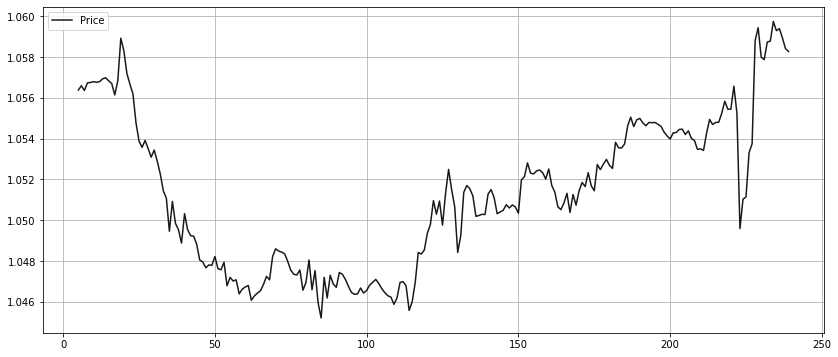

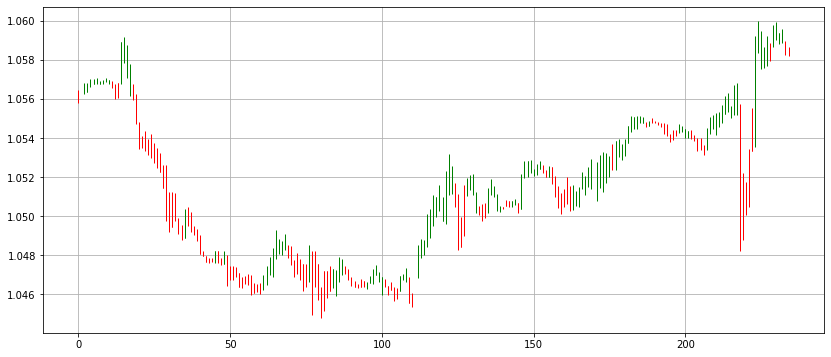

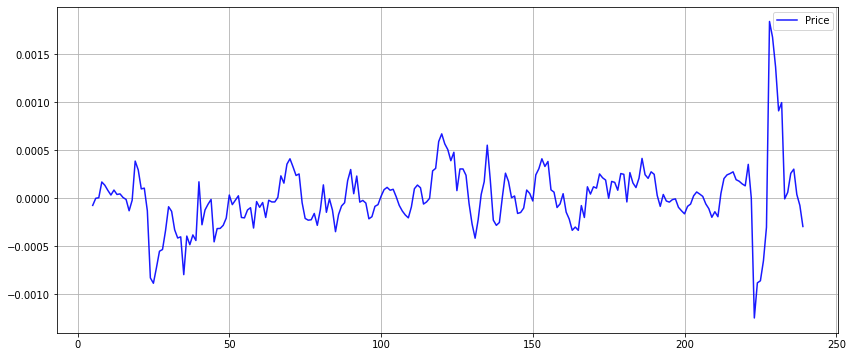

In [64]:

plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Price', color='black', alpha=0.9)
plt.legend()
plt.grid(True)
plt.show()

ohlcPlot(df)

plt.figure(figsize=(14, 6))
plt.plot(df['slope'], label='Price', color='blue', alpha=0.9)
plt.legend()
plt.grid(True)
plt.show()
